In [1]:
import pandas as pd
df=pd.read_csv("Fertilizer Prediction.csv", encoding="utf-8")
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [2]:
import numpy as np 
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [60]:
df["Soil Type"].value_counts()

Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: Soil Type, dtype: int64

In [61]:
df["Crop Type"].value_counts()

Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: Crop Type, dtype: int64

In [8]:
df["Fertilizer Name"].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Soil Type']  = label_encoder.fit_transform(df['Soil Type'])
df['Crop Type']  = label_encoder.fit_transform(df['Crop Type'])
#df['Fertilizer Name']  = label_encoder.fit_transform(df['Fertilizer Name'])

In [6]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea


In [4]:
X = df.drop('Fertilizer Name', axis =1)
Y = df['Fertilizer Name']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=20)

In [5]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [6]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,Y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Y_test,predicted_values))

DecisionTrees's Accuracy is:  96.0
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       1.00      1.00      1.00         4
    17-17-17       0.67      1.00      0.80         2
       20-20       1.00      1.00      1.00         2
       28-28       1.00      1.00      1.00         2
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         8

    accuracy                           0.96        25
   macro avg       0.95      0.93      0.92        25
weighted avg       0.97      0.96      0.96        25



In [10]:
# Cross validation score (Decision Tree)
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTree,X,Y,cv=5)
score*100

array([ 95., 100.,  95.,  95., 100.])

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,predicted_values)
print(cm)
accuracy_score(Y_test,predicted_values)

[[1 0 1 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 0 8]]


0.96

Text(0.5, 1.0, 'Confusion Matrix for Fertilizer Prediction')

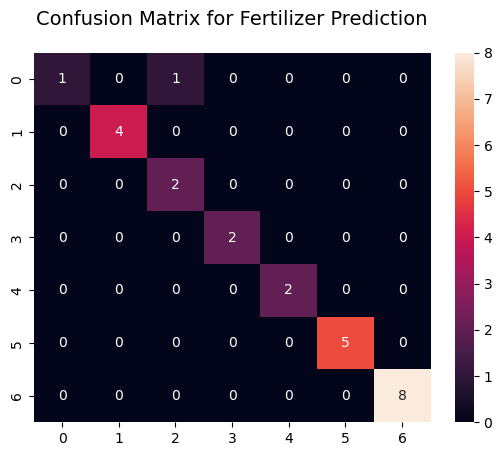

In [17]:

ax=sns.heatmap(cm, annot=True, fmt='d', )
ax.set_title("Confusion Matrix for Fertilizer Prediction", fontsize=14, pad=20)

In [67]:
df["Fertilizer Name"].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

In [68]:
import pickle
DT_pkl_filename = 'DecisionTree_fert.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

In [53]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train,Y_train)
log_reg.score(X_test,Y_test)

0.88

In [9]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,Y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

RF's Accuracy is:  0.88
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       1.00      1.00      1.00         4
    17-17-17       0.00      0.00      0.00         2
       20-20       0.50      1.00      0.67         2
       28-28       1.00      1.00      1.00         2
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         8

    accuracy                           0.88        25
   macro avg       0.79      0.79      0.76        25
weighted avg       0.88      0.88      0.87        25



In [10]:
df.size

891

In [8]:
input_data = (24,54,38,2,0,37,0,0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction =DecisionTree.predict(input_data_reshaped)
print(prediction)

['Urea']


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [73]:
import pickle
NB_pkl_filename = 'NBClassifier_fert2.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()

In [74]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [75]:
df['Soil Type'].value_counts()

2    21
4    20
1    20
0    19
3    19
Name: Soil Type, dtype: int64

In [45]:
df['Crop Type'].value_counts()

8     13
1     12
4     11
6     10
7     10
10     9
9      7
0      7
5      7
2      7
3      6
Name: Crop Type, dtype: int64